In [1]:
import pandas as pd
import numpy as np

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Read Data from CSV File
url = "https://raw.githubusercontent.com/neha-mishra/Evaluation-Projects/main/Rainfall_Prediction-Weather_Forecasting/weatherAUS.csv"
df = pd.read_csv(url)

# Adjust index to start from 1 instead of 0
df.index += 1

In [27]:
# Show top 5 rows of DataFrame
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
3,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
4,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
5,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
# Check DataFrame Shape
df.shape

(8425, 23)

In [28]:
# Get full info of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 1 to 8425
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [29]:
# Get Summery of DataFrame
df.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,8425,8425,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434,7434.000000,7596,...,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000,8185,8186
unique,3004,12,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2011-01-31,Melbourne,NaN,NaN,NaN,NaN,NaN,N,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,5,1622,NaN,NaN,NaN,NaN,NaN,713,NaN,906,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6195,6195
mean,NaN,NaN,13.193305,23.859976,2.805913,5.389395,7.632205,NaN,40.174469,NaN,...,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,NaN,NaN
std,NaN,NaN,5.403596,6.136408,10.459379,5.044484,3.896235,NaN,14.665721,NaN,...,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020,NaN,NaN
min,NaN,NaN,-2.000000,8.200000,0.000000,0.000000,0.000000,NaN,7.000000,NaN,...,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,NaN,NaN
25%,NaN,NaN,9.200000,19.300000,0.000000,2.600000,4.750000,NaN,30.000000,NaN,...,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000,NaN,NaN
50%,NaN,NaN,13.300000,23.300000,0.000000,4.600000,8.700000,NaN,39.000000,NaN,...,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000,NaN,NaN
75%,NaN,NaN,17.400000,28.000000,1.000000,7.000000,10.700000,NaN,50.000000,NaN,...,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000,NaN,NaN


In [9]:
# Get DataFrame of rows with missing data
null_data = df[df.isnull().any(axis=1)]
null_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
3,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
4,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
5,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8421,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8422,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8423,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8424,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


<AxesSubplot:>

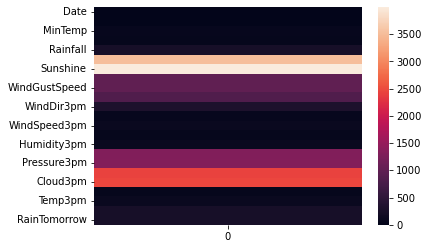

In [10]:
# Check DataFrame for null value
sns.heatmap(df.isnull().sum().to_frame())

In [30]:
categorical_data = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
print("Total Categorical Data: {}".format(len(categorical_data)))
print("Categorical Data: ",categorical_data)

Total Categorical Data: 7
Categorical Data:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [31]:
numerical_data = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
print("Total Numerical Data: {}".format(len(numerical_data)))
print("Numerical Data: ",numerical_data)

Total Numerical Data: 16
Numerical Data:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [32]:
# Separate Date Column
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop Date column
df.drop('Date', axis = 1, inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
1,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
2,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
3,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
4,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
5,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [33]:
# Missing values in Categorical Data
categorical_data = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
df[categorical_data].isnull().sum()

Location          0
WindGustDir     991
WindDir9am      829
WindDir3pm      308
RainToday       240
RainTomorrow    239
dtype: int64

In [35]:
# Replacing missing values in Categorical Data with the most frequent value
categorical_data_with_null = [feature for feature in categorical_data if df[feature].isnull().sum()]
for each_data in categorical_data_with_null:
    freq_val = df[each_data].mode()[0]
    df[each_data].fillna(freq_val,inplace=True)

In [36]:
# Missing values in Numerical Data
numerical_data = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
df[numerical_data].isnull().sum()

MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustSpeed     991
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
Year                0
Month               0
Day                 0
dtype: int64

In [37]:
# Remove outliers from Numerical Data
data_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for data in data_with_outliers:
    q1 = df[data].quantile(0.25)
    q3 = df[data].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[data]<lower_limit,data] = lower_limit
    df.loc[df[data]>upper_limit,data] = upper_limit

In [38]:
# Replace missing values in numerical data using mean
numerical_data_with_null = [feature for feature in numerical_features if df[feature].isnull().sum()]
for feature in numerical_data_with_null:
    mean_value = df[feature].mean()
    df[feature].fillna(mean_value,inplace=True)

In [46]:
# Encode categorical data to numerical data

def encode_data(feature_name):

    mapping_dict = {}

    unique_values = list(df[feature_name].unique())

    for idx in range(len(unique_values)):

        mapping_dict[unique_values[idx]] = idx

    return mapping_dict

df['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)
df['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

df['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)
df['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)
df['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)
df['Location'].replace(encode_data('Location'), inplace = True)

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
1,0,13.4,22.9,0.6,5.119906,7.632205,0,44.0,0,0,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,2008,12,1
2,0,7.4,25.1,0.0,5.119906,7.632205,1,44.0,1,1,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2008,12,2
3,0,12.9,25.7,0.0,5.119906,7.632205,2,46.0,0,1,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,2008,12,3
4,0,9.2,28.0,0.0,5.119906,7.632205,3,24.0,2,2,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,2008,12,4
5,0,17.5,32.3,1.0,5.119906,7.632205,0,41.0,3,3,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12,5


# Data Visualization

<AxesSubplot:>

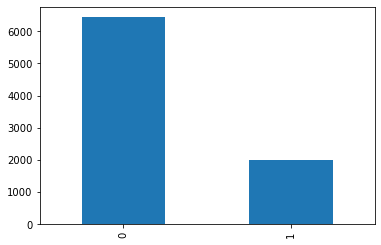

In [47]:
df['RainTomorrow'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

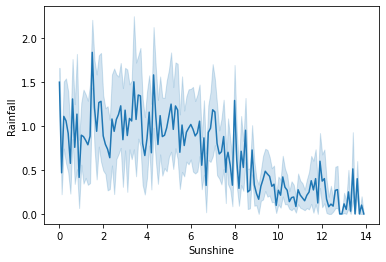

In [48]:
# Sunshine vs Rainfall
sns.lineplot(data=df,x='Sunshine',y='Rainfall')

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

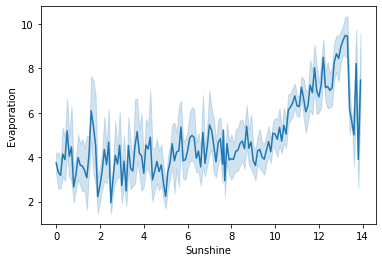

In [49]:
# Sunshine vs Evaporation
sns.lineplot(data=df,x='Sunshine',y='Evaporation')

<AxesSubplot:>

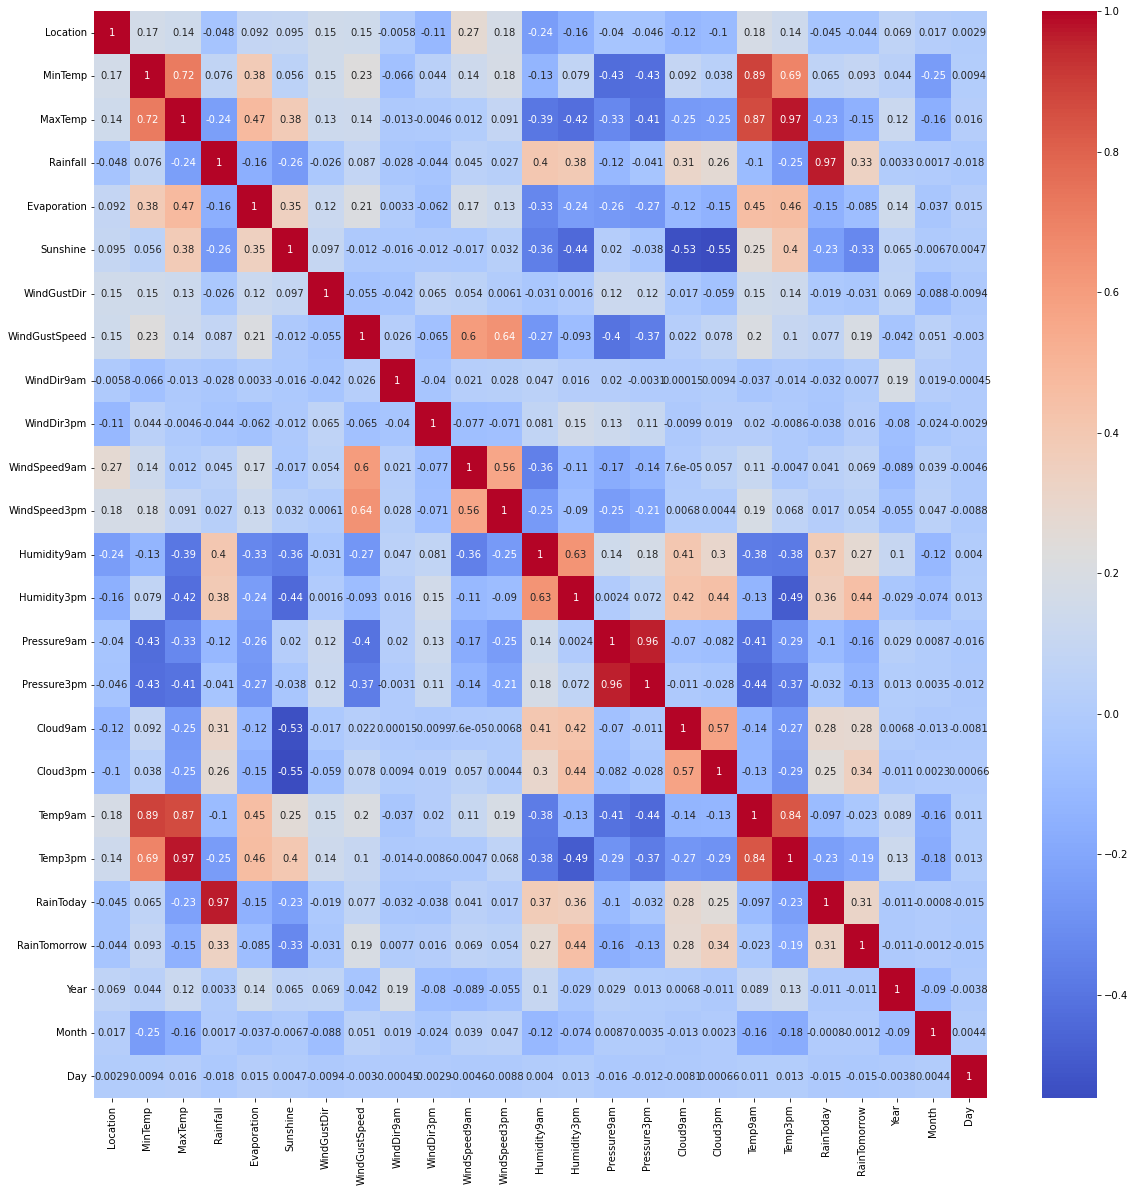

In [51]:
# Correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [52]:
input_features = df.drop(['RainTomorrow'],axis=1)
target_features = df['RainTomorrow']

In [53]:
# Extra Trees Regressor
from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(input_features,target_features)
etr_model.feature_importances_

array([0.0263853 , 0.02685142, 0.02887325, 0.04620098, 0.02418563,
       0.04170479, 0.02925578, 0.05866402, 0.03148579, 0.03346936,
       0.03257025, 0.03612693, 0.04011459, 0.19467728, 0.0288504 ,
       0.03444078, 0.02880306, 0.06136981, 0.02614945, 0.0274223 ,
       0.04690989, 0.03056029, 0.02950378, 0.03542487])

<AxesSubplot:>

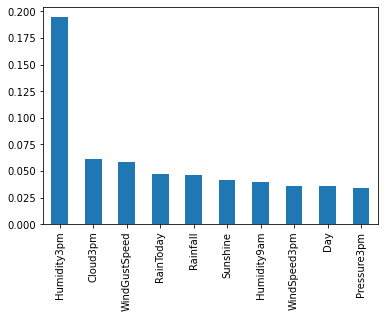

In [56]:
feature_imp = pd.Series(etr_model.feature_importances_,index=input_features.columns)
feature_imp.nlargest(10).plot(kind='bar')

In [58]:
# Splitting Data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_features,target_features, test_size = 0.2, random_state = 0)

In [59]:
print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 6740
Length of Testing Data: 1685


In [60]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [61]:
X_test = scaler.transform(X_test)

# Logistic Regression

In [62]:
# Model Training
from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [63]:
# Model Testing
y_pred = classifier_logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
# Evaluate Model Performance
from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.8367952522255193


In [65]:
# Checking for Underfitting and Overfitting
print("Train Data Score: {}".format(classifier_logreg.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier_logreg.score(X_test, y_test)))

Train Data Score: 0.8302670623145401
Test Data Score: 0.8367952522255193


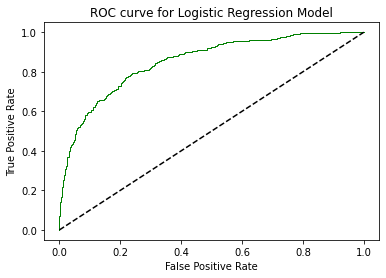

In [67]:
# ROC curve
y_pred_logreg_proba = classifier_logreg.predict_proba(X_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [68]:
# Cross-Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.82937685 0.83456973 0.83308605 0.83679525 0.81973294]
Average cross-validation score: 0.8307121661721067
